Problem Description:
You have a box containing 10 ping pong balls. 5 are green and 5 are blue.

The green balls are numbered 1-5. The blue balls are also numbered 1-5.

You play a game where you choose one ball at random.

If the ball chosen is green, you win $5.

If the ball chosen is a 3, you win $50.

If the ball chosen is both green and a 3, you win $10,000.

Use boostrapping (i.e., run a simulation) to estimate the probability of winning under all three scenarios. Graph and interpret the solutions using a box plots. Interpret the results.

Vary the number of simulations and interpret the results.

In [ ]:
# Load the required data analysis and graphing packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
# Define the storage location for the results as a Pandas DataFrame

My_Simulation_Results = pd.DataFrame(columns = ['Color', 'Number'])

# Define the colors

colors =['Blue', 'Green']

print(My_Simulation_Results)
print(colors)

Empty DataFrame
Columns: [Color, Number]
Index: []
['Blue', 'Green']


In [ ]:
# Set up the number of repititions (10,000 is the default)
repititions = 10000

# Set up the simulateion
List_of_Chosen_Balls = [] # Defines a list to store the simulation results
for rep in range(repititions):
  chosen_color = random.choice(colors) # Picks a color to represent the chosen ball's color
  chosen_number = random.randint(1,5) # Picks an integer 1-5 randmonly to represent the chosen ball's number
  chosen_ball = [chosen_color, chosen_number]
  List_of_Chosen_Balls.append(chosen_ball) # Adds the chosen ball to the list

# Store the list of chosen balls a Pandas DataFrame
My_Simulation_Results = pd.DataFrame(List_of_Chosen_Balls, columns = ['Color', 'Number'])

# Review the results
print(My_Simulation_Results.head(20))

    Color  Number
0    Blue       2
1   Green       1
2    Blue       3
3    Blue       3
4   Green       4
5   Green       2
6   Green       1
7    Blue       4
8    Blue       4
9    Blue       4
10  Green       5
11   Blue       2
12   Blue       3
13  Green       1
14   Blue       3
15   Blue       3
16   Blue       1
17   Blue       1
18  Green       4
19  Green       5


Color
Blue     4937
Green    5063
dtype: int64


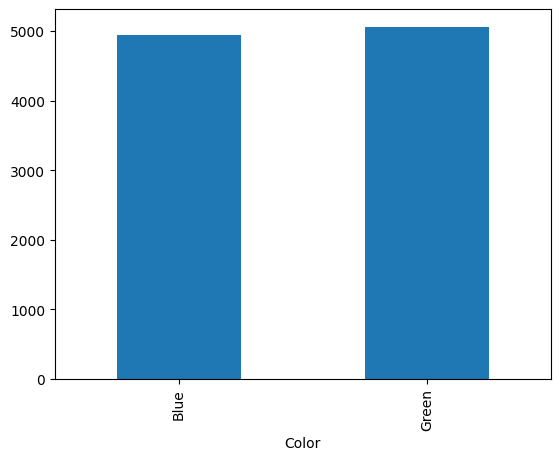

In [ ]:
# Results for winning $5

# Bar Chart grouped by color
Grouped_by_Color = My_Simulation_Results.groupby('Color').size() # Determines count in each Color group
print(Grouped_by_Color)
Grouped_by_Color.plot.bar()
plt.show()


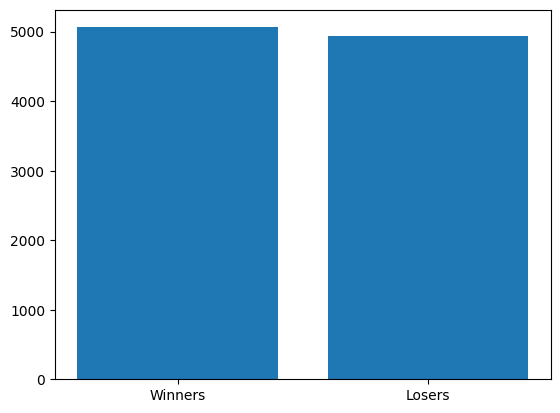

The number of $5 winners is 5063 .
The probability of winning $5 based on our simulation is 50.63 %.


In [ ]:
# Probability of winning $5
# Find the number of wins
# We are interested in Green balls

# Slice out number of $5 winners from the size of each Color category

# The 2nd row starting at 0 contains the $5 winner; Pull the value using he .loc function and the row name
Count_of_5_winners = Grouped_by_Color.loc['Green']

# Calculate the number of Losers
Count_of_5_losers = repititions-Count_of_5_winners

# Graph the results and calculate percentages
x = ['Winners', 'Losers']
y = [Count_of_5_winners, Count_of_5_losers]
plt.bar(x, y)
plt.show()

# Pull the required value for wins
print('The number of $5 winners is', Count_of_5_winners,'.')
print('The probability of winning $5 based on our simulation is', 100*Count_of_5_winners/repititions, '%.')


Number
1    2071
2    2020
3    1941
4    1979
5    1989
dtype: int64


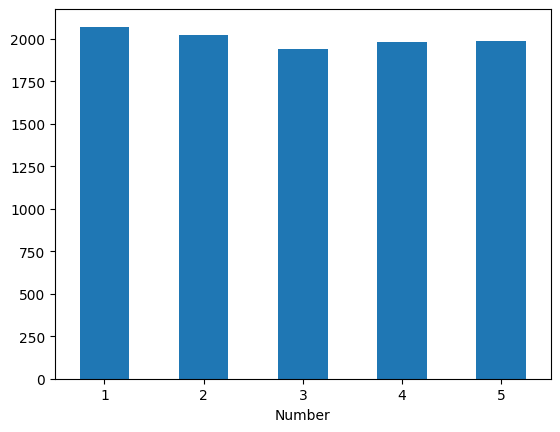

In [ ]:
# Results for winning $50

# Bar Chart grouped by color
Grouped_by_Number = My_Simulation_Results.groupby('Number').size() # Determines the count in each number group
print(Grouped_by_Number)
Grouped_by_Number.plot.bar()
plt.xticks(rotation = 0)
plt.show()


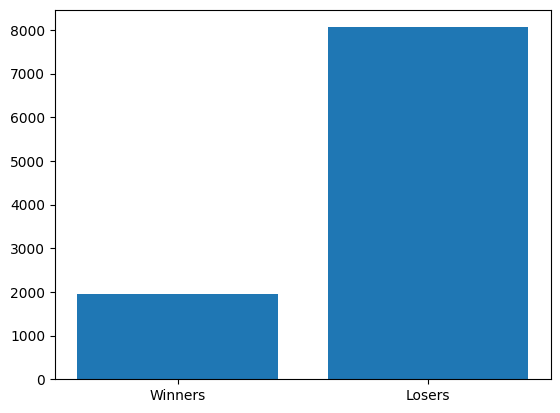

The number of $50 winners is 1941 .
The probability of winning $50 based on our simulation is 19.41 %.


In [ ]:
# Probability of winning $50

# Find the number of wins
# We are interested in 3's

# Slice out number of $50 winners from the size of each number category

# The 2nd row starting at 0 contains the $50 winner; Extracted using the name of 3rd row--3
Count_of_50_winners = Grouped_by_Number.loc[3] # The 2nd row beginning counting at 0 contains the $5 winner; Value only

# Calculate the number of Losers
Count_of_50_losers = repititions-Count_of_50_winners

# Graph the results and calculate percentages
x = ['Winners', 'Losers']
y = [Count_of_50_winners, Count_of_50_losers]
plt.bar(x, y)
plt.show()

# Pull the required value for wins
print('The number of $50 winners is', Count_of_50_winners,'.')
print('The probability of winning $50 based on our simulation is', 100*Count_of_50_winners/repititions, '%.')

Color  Number
Blue   1          989
       2          984
       3         1013
       4          959
       5          992
Green  1         1082
       2         1036
       3          928
       4         1020
       5          997
dtype: int64


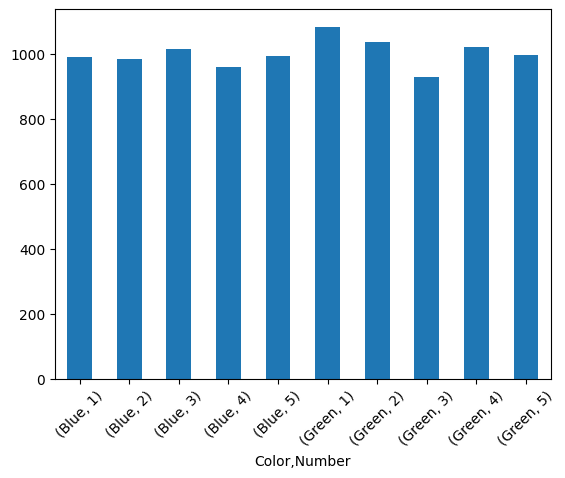

In [ ]:
# Results for winning $10,000

# Bar Chart grouped by color and number
Double_Grouped = My_Simulation_Results.groupby(['Color', 'Number'])
Count_of_Double_Grouped = Double_Grouped.size()
print(Count_of_Double_Grouped)

# Plot the results
Count_of_Double_Grouped.plot.bar()
plt.xticks(rotation = 45)
plt.show()


      Color  Number
1     Green       1
4     Green       4
5     Green       2
6     Green       1
10    Green       5
...     ...     ...
9993  Green       5
9994  Green       5
9995  Green       4
9996  Green       4
9998  Green       3

[5063 rows x 2 columns]


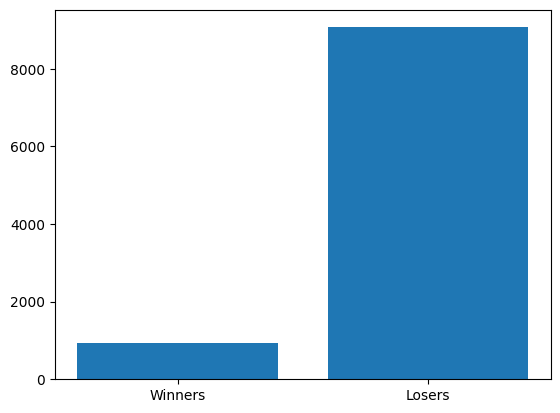

The number of $10,000 winners is 928 .
The probability of winning $10,000 based on our simulation is 9.28 %.


In [ ]:
# Probability of Winning $10,000

# Find the number of wins
# We are interested in Green 3's

Green_Balls = My_Simulation_Results.groupby('Color').get_group('Green')

# EDA
print(Green_Balls)

# Group the Green balls by Number and count the results
Count_of_Green_Balls = Green_Balls.groupby('Number').size()

# Slice out number of $10,000 winners from the Count of Green Balls

# The 2nd row starting at 0 contains the $10,000 winner; Exract the value of interest using .loc
Count_of_10000_winners = Count_of_Green_Balls.loc[3] # The 2nd row starting at 0, labeled as 3, contains the $10,000 winner

# Calculate the number of Losers
Count_of_10000_losers = repititions-Count_of_10000_winners

# Graph the results and calculate percentages
x = ['Winners', 'Losers']
y = [Count_of_10000_winners, Count_of_10000_losers]
plt.bar(x, y)
plt.show()

# Pull the required value for wins
print('The number of $10,000 winners is', Count_of_10000_winners,'.')
print('The probability of winning $10,000 based on our simulation is', 100*Count_of_10000_winners/repititions, '%.')

